In [42]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
import datetime
from helpers import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [285]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../../train.csv' # TODO: download train data and supply path here 
y, tX_starting, ids = load_csv_data(DATA_TRAIN_PATH,sub_sample=False)

In [286]:
#tX[tX==-999]=0

# Pandas

In [370]:
import pandas as pd

In [408]:
# General data description
pd_data=pd.read_csv(DATA_TRAIN_PATH)
pd_data=pd_data.replace({'s':1,'b':-1})
del pd_data['Id']
pd_data.describe()

,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,-0.314664,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591
std,0.949205,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662
min,-1.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,-1.000000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,-1.000000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500
75%,1.000000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750
max,1.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


In [409]:
# Number of nan
pd_data[pd_data==-999].count()

Prediction                          0
DER_mass_MMC                    38114
DER_mass_transverse_met_lep         0
DER_mass_vis                        0
DER_pt_h                            0
DER_deltaeta_jet_jet           177457
DER_mass_jet_jet               177457
DER_prodeta_jet_jet            177457
DER_deltar_tau_lep                  0
DER_pt_tot                          0
DER_sum_pt                          0
DER_pt_ratio_lep_tau                0
DER_met_phi_centrality              0
DER_lep_eta_centrality         177457
PRI_tau_pt                          0
PRI_tau_eta                         0
PRI_tau_phi                         0
PRI_lep_pt                          0
PRI_lep_eta                         0
PRI_lep_phi                         0
PRI_met                             0
PRI_met_phi                         0
PRI_met_sumet                       0
PRI_jet_num                         0
PRI_jet_leading_pt              99913
PRI_jet_leading_eta             99913
PRI_jet_lead

In [413]:
# Correlation matrix
pd_data2=pd_data.replace({-999:0})
pd_data2=pd_data.replace({-999:0})
corr_matrix=pd_data2.corr()
corr_matrix.Prediction

Prediction                     1.000000
DER_mass_MMC                   0.161623
DER_mass_transverse_met_lep   -0.351428
DER_mass_vis                  -0.014055
DER_pt_h                       0.192526
DER_deltaeta_jet_jet           0.227925
DER_mass_jet_jet               0.227832
DER_prodeta_jet_jet           -0.189891
DER_deltar_tau_lep             0.012245
DER_pt_tot                    -0.015287
DER_sum_pt                     0.153236
DER_pt_ratio_lep_tau          -0.195398
DER_met_phi_centrality         0.271752
DER_lep_eta_centrality         0.223175
PRI_tau_pt                     0.235238
PRI_tau_eta                   -0.000943
PRI_tau_phi                   -0.004403
PRI_lep_pt                    -0.031948
PRI_lep_eta                    0.001516
PRI_lep_phi                    0.004125
PRI_met                        0.022466
PRI_met_phi                    0.007475
PRI_met_sumet                  0.135520
PRI_jet_num                    0.133549
PRI_jet_leading_pt             0.165253


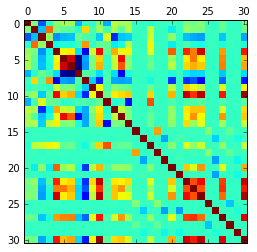

In [411]:
plt.matshow(pd_data2.corr())

# Data analysis

(array([ 177457.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,     310.,   61764.,   10469.]),
 array([-999.        , -984.49014286, -969.98028571, -955.47042857,
        -940.96057143, -926.45071429, -911.94085714, -897.431     ,
        -882.92114286, -868.41128571, -853.90142857, -839.39157143

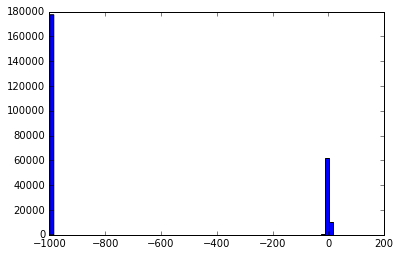

In [369]:
plt.hist(tX_starting[:,6],bins=70)

In [353]:
drop_columns=[]
for i in range(tX_starting.shape[1]):
    coeff=np.corrcoef(y,tX_starting[:,i])[0,1]
    if abs(coeff)<0.003:
        drop_columns.append(i)
tX=np.delete(tX_starting,drop_columns,axis=1)
tX.shape

(250000, 28)

In [354]:
#tX[tX==-999]=0

In [355]:
# Normalizing
#mean=np.sum(tX,axis=0)/tX.shape[0]
#std=np.sqrt(np.sum(tX**2,axis=0)/tX.shape[0])
#tX=(tX-mean)/std

In [356]:
tX.shape

(250000, 28)

# Splitting data

In [357]:
def split_data(x, y, ratio, seed=1):
    """split the dataset based on the split ratio."""
    # set seed
    np.random.seed(seed)
    print(x.shape)
    train_elements=int(ratio*x.shape[0])
    test_elements=x.shape[0]-train_elements
    print(train_elements,test_elements)
    indices = np.random.permutation(x.shape[0])
    training_idx, test_idx = indices[:train_elements], indices[train_elements:]
    x_train, x_test = x[training_idx], x[test_idx]
    y_train, y_test = y[training_idx], y[test_idx]
    return x_train,x_test,y_train,y_test

In [358]:
tX_train,tX_test,y_train,y_test=split_data(tX,y,0.5,1)
tX_test.shape

(250000, 28)
125000 125000


(125000, 28)

## Do your thing crazy machine learning thing here :) ...

In [359]:
def compute_loss(y, tX, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    error= y-tX.dot(w)
    square=np.sum(error**2)/error.shape[0]
    return square

In [360]:
def compute_gradient(y, tX, w):
    """Compute the gradient."""
    N=tX.shape[0]
    error=y-tX.dot(w)
    gradient=-1.0/N*(np.transpose(tX).dot(error))
    return gradient
        
compute_gradient(y_train,tX_train,np.zeros([tX_train.shape[1]])).shape

(28,)

In [361]:
def gradient_descent(y, tX, initial_w, max_iters, gamma): 
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # Compute gradient and loss
        gradient=compute_gradient(y,tX,w)
        loss=compute_loss(y,tX,w)
        # Update w by gradient
        w=w-gamma*gradient
        # store w and loss
        ws.append(np.copy(w))
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}".format(
              bi=n_iter, ti=max_iters - 1, l=loss))

    print(w.shape)
    return loss, w

In [362]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient for batch data."""
    N=tx.shape[0]
    error=y-tx.dot(w)
    gradient=-1.0/N*(np.transpose(tx).dot(error))
    return gradient


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_epochs, gamma):
    """Stochastic gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    y_shuffle=[]
    tx_shuffle=[]
    for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
        y_shuffle.append(minibatch_y)
        tx_shuffle.append(minibatch_tx)
    for n_iter in range(max_epochs):
        # compute stochastic gradient
        gradient=compute_stoch_gradient(y_shuffle[n_iter],tx_shuffle[n_iter],w)
        loss=compute_loss(y,tx,w)
        # update w
        w=w-gamma*gradient
        # store w and loss
        ws.append(np.copy(w))
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return loss, w

In [363]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.00001

# Initialization
w_initial = np.ones(tX.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, w = gradient_descent(y, tX, w_initial, max_iters, gamma)
#gradient_losses, w = stochastic_gradient_descent(y_train, tX_train, w_initial,30, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

print(sum((y_test-tX_test.dot(w))**2)/tX_test.shape[0])

Gradient Descent(0/49): loss=50511915.38288502
Gradient Descent(1/49): loss=156329308338.88947
Gradient Descent(2/49): loss=496301113835573.94
Gradient Descent(3/49): loss=1.5757085075368845e+18
Gradient Descent(4/49): loss=5.002725024739957e+21
Gradient Descent(5/49): loss=1.5883177369305333e+25
Gradient Descent(6/49): loss=5.04275813879282e+28
Gradient Descent(7/49): loss=1.6010278708783432e+32
Gradient Descent(8/49): loss=5.0831116083288145e+35
Gradient Descent(9/49): loss=1.6138397146423256e+39
Gradient Descent(10/49): loss=5.1237879968822956e+42
Gradient Descent(11/49): loss=1.626754082130988e+46
Gradient Descent(12/49): loss=5.164789888535705e+49
Gradient Descent(13/49): loss=1.6397717937659823e+53
Gradient Descent(14/49): loss=5.206119888049968e+56
Gradient Descent(15/49): loss=1.652893676534202e+60
Gradient Descent(16/49): loss=5.247780621030008e+63
Gradient Descent(17/49): loss=1.6661205640403e+67
Gradient Descent(18/49): loss=5.289774734091517e+70
Gradient Descent(19/49): los

In [364]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # returns mse, and optimal weights
    
    w=np.linalg.solve(tx.T.dot(tx),tx.T.dot(y))
    mse=sum((y-tx.dot(w))**2)/tx.shape[0]
    
    return mse,w
    
mse,w=least_squares(y_train,tX_train)
print(mse,w)

0.67968773238 [  7.87914737e-05  -7.09725507e-03  -6.07515452e-03  -4.68694696e-04
  -1.67035418e-02   4.67914022e-04  -2.63478247e-02   3.29199923e-01
   1.23287753e-04  -6.43881725e+00  -2.24528984e-01   9.61048944e-02
   6.35356661e-02   6.44691339e+00  -5.23767053e-04   6.45180891e+00
  -1.14343416e-04   3.73705921e-03  -1.40895472e-04  -5.51527503e-04
  -3.35039066e-01  -1.49664999e-03   3.75586626e-04   1.57023333e-03
  -1.61263588e-03  -5.96948193e-03  -1.29102310e-02   6.43930089e+00]


In [365]:
def ridge_regression(y, tx, lamb):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    w=np.linalg.solve(tx.T.dot(tx)+lamb**2*np.identity(tx.shape[1]),tx.T.dot(y))
    mse=sum((y-tx.dot(w))**2)/tx.shape[0]
    return mse,w

mse,w=ridge_regression(y_train,tX_train,0)
print(mse,w)

0.67968773238 [  7.87914737e-05  -7.09725507e-03  -6.07515452e-03  -4.68694696e-04
  -1.67035418e-02   4.67914022e-04  -2.63478247e-02   3.29199923e-01
   1.23287753e-04  -6.43881725e+00  -2.24528984e-01   9.61048944e-02
   6.35356661e-02   6.44691339e+00  -5.23767053e-04   6.45180891e+00
  -1.14343416e-04   3.73705921e-03  -1.40895472e-04  -5.51527503e-04
  -3.35039066e-01  -1.49664999e-03   3.75586626e-04   1.57023333e-03
  -1.61263588e-03  -5.96948193e-03  -1.29102310e-02   6.43930089e+00]


# Test on training dataset

In [366]:
def compute_predictions(tX,w):
    prediction=tX.dot(w)
    prediction[np.where(prediction <= 0)] = -1
    prediction[np.where(prediction > 0)] = 1
    return prediction

In [367]:
def evaluate_prediction(prediction,y):
    print((sum(y*prediction)/y.shape[0]+1)/2)

In [368]:
tX_test_post=np.copy(tX_test)
tX_test_post[tX_test_post==-999]=0
prediction=compute_predictions(tX_test,w)
evaluate_prediction(prediction,y_test)

0.744176


In [186]:
print(sum((y_test-tX_test.dot(w))**2)/tX_test.shape[0])
print(tX_test.dot(w))

0.706787284653
[ 0.28976197  0.27222802 -0.27184157 ..., -0.52214609 -0.0157873
 -0.55324264]


## Generate predictions and save ouput in csv format for submission:

In [38]:
DATA_TEST_PATH = '../../test.csv' # TODO: download train data and supply path here 
_, tX_final_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [40]:
OUTPUT_PATH = '../../predictions.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(w, tX_final_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)
print(y_pred)

[-1. -1. -1. ..., -1. -1. -1.]
